In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
def readCsv(fileName):
    fullFileName = r'C:\Users\Owner\McGill\4thYear\COMP551\Assignment1\Datasets\Dataset_' + fileName
    df = pd.read_csv(fullFileName, encoding='utf-8', header = None,
                 comment='#', sep=',')
    
    y = df[1].as_matrix()
    y.shape
    return df

In [3]:
def graphData(fileName):
    df = readCsv(fileName)
    plt.figure(figsize=(20,8), dpi=80)
    plt.scatter(df[0], df[1], marker='*')
    plt.show()


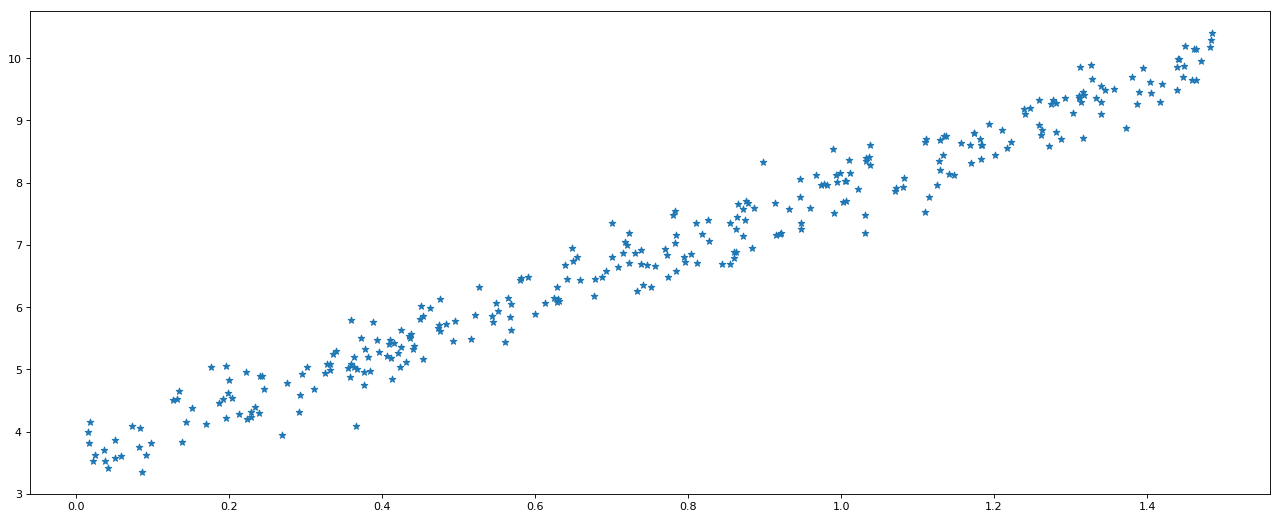

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
0    300 non-null float64
1    300 non-null float64
2    0 non-null float64
dtypes: float64(3)
memory usage: 7.1 KB


In [4]:
graphData('2_train.csv')
df = readCsv('2_train.csv')
df.info()

In [17]:
def repeatUntilConvergence():
    #Guess a w0 and w1
    w0 = 10
    w1 = 10
    df = readCsv('2_train.csv')
    learningRate = 10**(-4)
    print('Learning rate: ', learningRate)
    #number of epochs
    MSEArray = list()
    epochs = np.linspace(0, 49, 50)
    for i in epochs:
        
        #number of rows in the dataset
        for j in range(1, len(df[0])):
            w0 = w0 - learningRate*(w0+w1*df[0][j]-df[1][j])
            w1 = w1 - learningRate*(w0+w1*df[0][j]-df[1][j])*df[0][j]
    
    #Now given that the epoch ran once, make a prediction for y and calculate MSE.  Then train for next epoch.  
        wEq = np.poly1d([w1,w0])
#         print(MSE(wEq))
        MSEArray.append(MSE(wEq))
    return (epochs, MSEArray)
    
    #We want to minimize this MSE
    #Plot training and validation MSE for every epoch     

In [18]:
def MSE(weightsEquation):
    df = readCsv('2_valid.csv')
    MSE = 0
    for i in range(0, len(df[0])):
        MSE = MSE + (weightsEquation(df[0][i])-df[1][i])**2
    MSE = MSE/len(df[0])
    return MSE

Learning rate:  0.0001


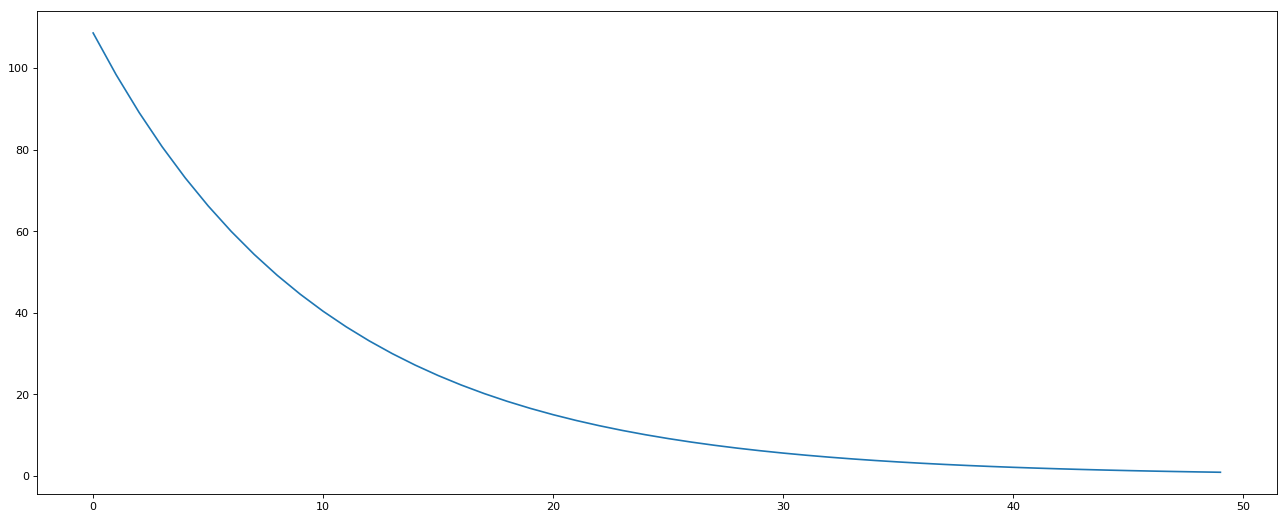

In [19]:
plt.figure(figsize=(20,8), dpi = 80)
epochsX, MSEY = repeatUntilConvergence()
plt.plot(epochsX, MSEY, '-')
plt.show()


In [20]:
df = readCsv('2_train.csv')
len(df[0])

300

In [26]:
def findSettlingTime(epochs, MSE):
    indexSettlingTime = 0
#     Converging algorithm
    minMSESettling = max(MSE)-(max(MSE)-min(MSE))*0.97
    print('MinMSESettling: ', minMSESettling)
    print('Epochs: ', epochs)
    for i in epochs:           
        if MSE[int(i)]<minMSESettling:
            indexSettlingTime = float(i)
            break
    
    print('IndexSettling: ', indexSettlingTime)

epochsA, MSEA = repeatUntilConvergence()
findSettlingTime(epochsA, MSEA)


Learning rate:  0.0001
MinMSESettling:  4.12411593642
Epochs:  [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.]
IndexSettling:  34.0
